# 数据预处理
# ROOM 房间数
# FLOR 0-低楼层 1-中楼层 2-高楼层
# AREA 面积
# TYPE 0-塔楼 1-板塔结合 2-板楼
# EVAL 0-无电梯 1-有电梯
# PRIC 每平米价格
# DISC 0-朝阳 1-东城 2-房山 3-海淀 4-通州 5-西城
# OLD 建造时间
# SUBC 周围1000m地铁站个数
# SUBD 最近地铁站距离
# CEDT 距市中心距离

In [ ]:
import pandas as pd
import json

data = list()

#处理键值数据
#删除多余项
def process(handle, district) -> list:
    d = json.load(handle)
    for kv in d:
        del kv['INTRO']
        del kv['ROUND']
        kv['AREA'] = kv['AREA'][:-1]
        if "南" in kv['FACE']:
            kv['FACE'] = 1
        else:
            kv['FACE'] = 0
        kv['DISC'] = district
        del kv['FACE']
        del kv['STRT']
        del kv['FITM']
        del kv['WARM']
        kv['OLD'] = kv['OLD'][0:kv['OLD'].find("年建")]
    return d

#处理各区数据
with open("./data/chaoyang.json", "r", encoding='utf-8') as fd:
    p = process(fd, 1)
    pd.DataFrame(p).to_csv("./data/chaoyang.csv")
    data+=p

with open("./data/dongcheng.json", "r", encoding='utf-8') as fd:
    p = process(fd, 2)
    pd.DataFrame(p).to_csv("./data/dongcheng.csv")
    data+=p

with open("./data/xicheng.json", "r", encoding='utf-8') as fd:
    p = process(fd, 3)
    pd.DataFrame(p).to_csv("./data/xicheng.csv")
    data+=p

with open("./data/haidian.json", "r", encoding='utf-8') as fd:
    p = process(fd, 4)
    pd.DataFrame(p).to_csv("./data/haidian.csv")
    data+=p

with open("./data/fangshan.json", "r", encoding='utf-8') as fd:
    p = process(fd, 5)
    pd.DataFrame(p).to_csv("./data/fangshan.csv")
    data+=p

with open("./data/tongzhou.json", "r", encoding='utf-8') as fd:
    p = process(fd, 6)
    pd.DataFrame(p).to_csv("./data/tongzhou.csv")
    data+=p

pd.DataFrame(data).to_csv("./data/beijing.csv")

# 多元线性回归模型

训练集的准确率:0.703487
测试集的准确率:0.646643
模型的系数为: [ 1.54723902e+03 -2.47207350e+01  2.03683341e+03  4.65398303e+03
  2.35201559e+03 -2.43645917e+02 -3.23412307e+03 -1.05292314e+03
 -2.86345346e+04  0.00000000e+00]
模型的截距为: 73135.19372302976
[104743.24031584  83409.55529416  68266.82408766  90658.08280465
  89564.63705369  71878.09602701  75645.5871344   70664.84815961
  90241.17721509  87261.1130359  108127.79121337 102993.65861351
  80803.84600809  81242.1142643  110952.90345674  94339.13388323
  85712.27953644  87752.0681115   76522.72826944  80272.83394925
 113336.66454264  64224.11070919  87022.04024131  73465.3547496
  87886.9536825   67366.18703412  63317.01793347  86282.14493139
  53490.28655047  93232.48820342  64271.52605196  92324.63975805
  85962.22289751  98706.8124953   90057.44382923 100188.36991726
  69210.84837565  60093.53626996  93268.09916289  93103.09154888
  74426.43384993  78178.05752294  81718.63731603  59237.55402412
  97916.607248    97002.96366198  94575.60513805 10303

<AxesSubplot: xlabel='Unnamed: 0'>

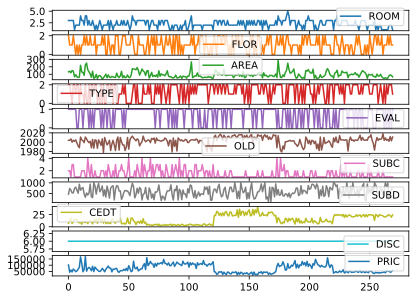

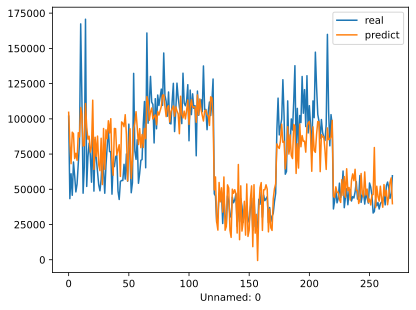

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# 加载数据
df = pd.DataFrame(pd.read_csv("./data/tongzhou.csv"))

#数据处理
y = df['PRIC']
del df['PRIC']
label = df['Unnamed: 0']
del df['Unnamed: 0']
X = df

# 特征数据标准化
#####################
stand = StandardScaler()           # 创建标准化对象
stand_X = stand.fit_transform(X)   # 对特征数据进行标准化处理
X = stand_X                        # 将特征数据重新指定为X                     # 将特征数据重新指定为X
#####################

# 划分训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

# 线性回归
model = LinearRegression()
model.fit(X_train, y_train)

#模型评估
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

#输出结果
print('训练集的准确率:%f'%train_score)
print('测试集的准确率:%f'%test_score)
print('模型的系数为:', model.coef_)
print('模型的截距为:',model.intercept_)

#StandardScaler().fit_transform(df+np.array([[3,0,87.86,2,1,2010,1,259,34.722857962977386,6]]))

#测试数据验证预测结果
df2 = pd.concat([df,pd.DataFrame([[1,2,63,0,1,2005,1,500,20,6]], columns=['ROOM','FLOR','AREA','TYPE','EVAL','OLD','SUBC','SUBD','CEDT','DISC'])])
#print(model.predict(X))
print(model.predict(StandardScaler().fit_transform(df2)))

#绘制实际数据和预测数据比较的折线图
df['PRIC'] = y
df.plot(subplots=True)
pd.DataFrame({"real": y, "predict": model.predict(X)}, index=label).plot()
